# POR ULTIMO LAS GRÁFICAS

## ¿Cómo se comportan los valores negativos, es decir que a comparación de años anteriores hubo un decremento en IED o PIB sectorial


In [12]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [13]:
dfinal3=pd.read_csv('dfOK.csv')

## 1. Identificar los valores negativos: destacar los sectores con datos negativos, crear una columna adicional que señale dónde ocurren

In [17]:
#Identificar los valores negativos: destacar los sectores con datos negativos, crear una columna adicional que señale dónde ocurren
dfinal3["Negativo"] = (dfinal3["PIB sectorial"] < 0) | (dfinal3["IDE A MDP"] < 0)


In [18]:
negativos = dfinal3[dfinal3["Negativo"]]
positivos = dfinal3[~dfinal3["Negativo"]]

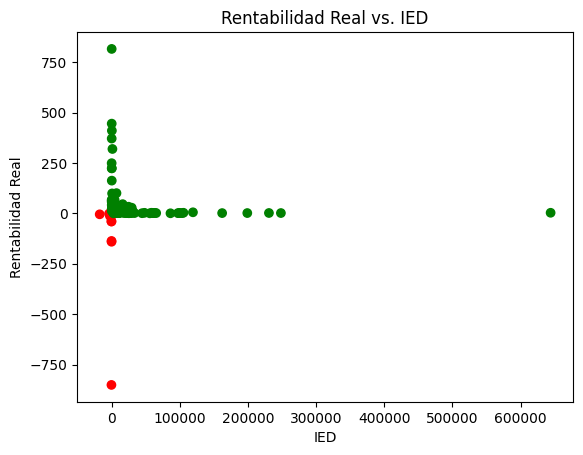

In [19]:
plt.scatter(dfinal3["IDE A MDP"], dfinal3["Rentabilidad real"], c=dfinal3["Negativo"].map({True: 'red', False: 'green'}))
plt.xlabel("IED")
plt.ylabel("Rentabilidad Real")
plt.title("Rentabilidad Real vs. IED")
plt.show()


## 2. Mostrar la actividad económica con mayor rentabilidad

Actividad con mayor rentabilidad:
Concepto             621 - Servicios mÃ©dicos de consulta externa y...
PIB sectorial                                               92984.8612
Rentabilidad real                                           815.656677
IDE A MDP                                                        114.0
Negativo                                                         False
Name: 126, dtype: object


C:\Users\Fernanda\AppData\Local\Temp\ipykernel_20772\4031687840.py:14: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


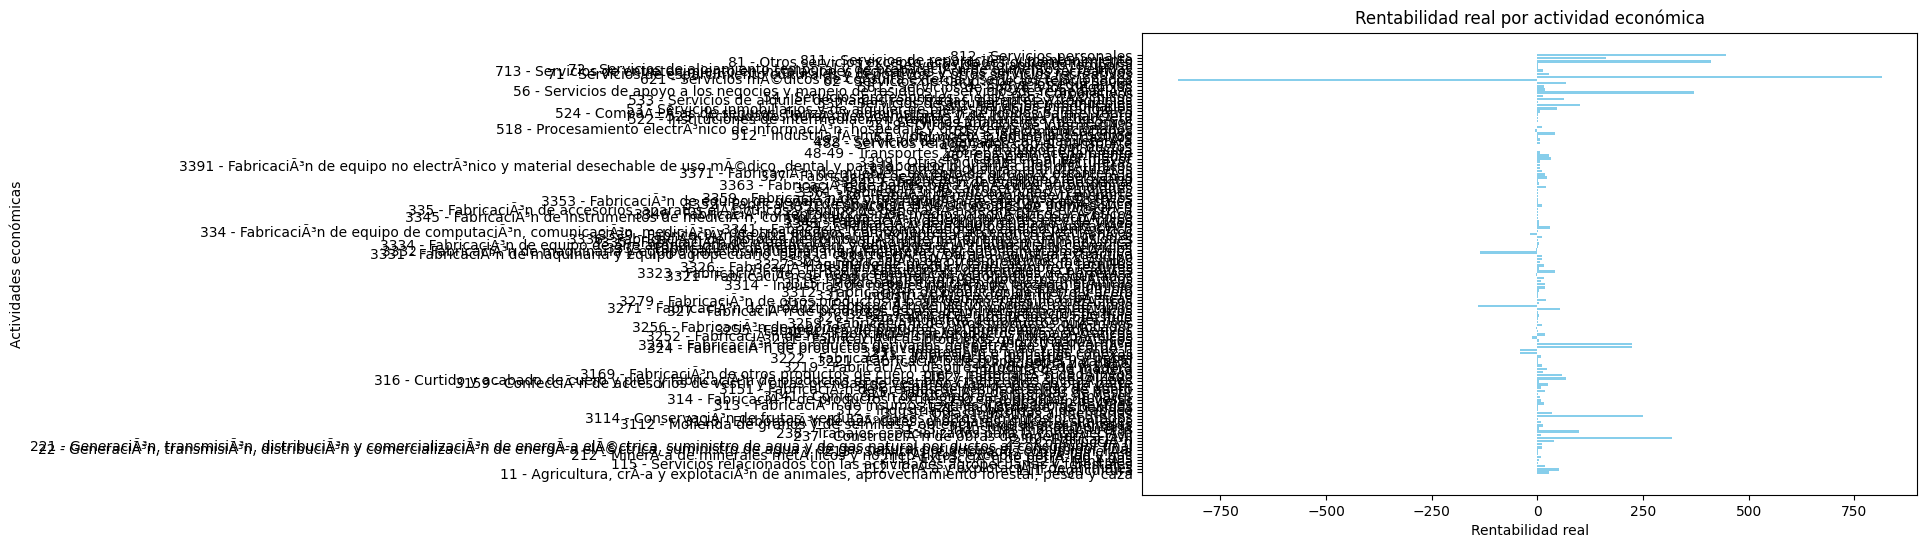

In [20]:
# Encontrar la actividad con mayor rentabilidad
mayor_rentabilidad = dfinal3.loc[dfinal3["Rentabilidad real"].idxmax()]

# Mostrar actividad con mayor rentabilidad
print("Actividad con mayor rentabilidad:")
print(mayor_rentabilidad)

# Graficar la rentabilidad de todas las actividades
plt.figure(figsize=(10, 6))
plt.barh(dfinal3["Concepto"], dfinal3["Rentabilidad real"], color='skyblue')
plt.xlabel("Rentabilidad real")
plt.ylabel("Actividades económicas")
plt.title("Rentabilidad real por actividad económica")
plt.tight_layout()
plt.show()

## 3. 10 Actividades con mayor rentabilidad

Top 10 actividades con mayor rentabilidad:
                                              Concepto  PIB sectorial  \
126  621 - Servicios mÃ©dicos de consulta externa y...     92984.8612   
133                         812 - Servicios personales     72095.4738   
131  81 - Otros servicios excepto actividades guber...    164924.8258   
121                                  55 - Corporativos     50465.6978   
11                                  236 - EdificaciÃ³n    383782.6468   
18   3114 - ConservaciÃ³n de frutas, verduras, guis...     18412.8812   
40   324 - FabricaciÃ³n de productos derivados del ...     48690.4236   
41   3241 - FabricaciÃ³n de productos derivados del...     48690.4236   
132     811 - Servicios de reparaciÃ³n y mantenimiento     39269.1166   
117                      531 - Servicios inmobiliarios    717652.8884   

     Rentabilidad real  IDE A MDP  Negativo  
126         815.656677      114.0     False  
133         445.033789      162.0     False  
131         410

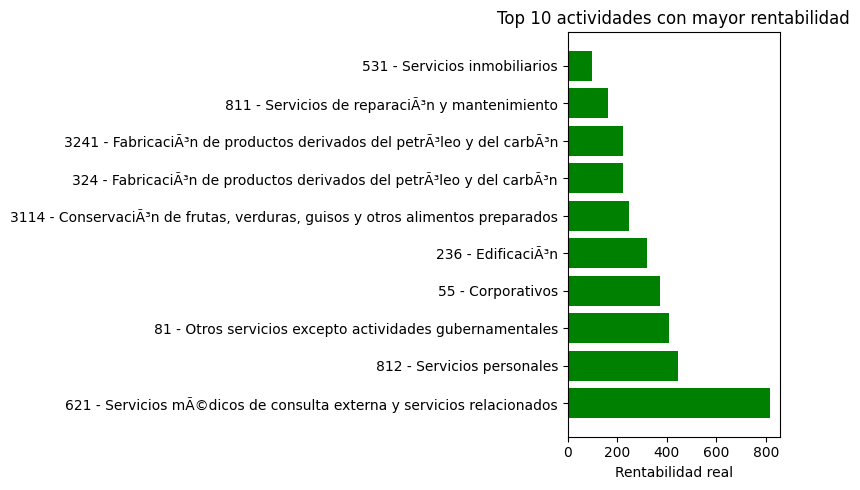

In [21]:
# Obtener el top 5
top_10 = dfinal3.nlargest(10, "Rentabilidad real")
print("Top 10 actividades con mayor rentabilidad:")
print(top_10)

# Graficar el top 5
plt.figure(figsize=(8, 5))
plt.barh(top_10["Concepto"], top_10["Rentabilidad real"], color='green')
plt.xlabel("Rentabilidad real")
plt.title("Top 10 actividades con mayor rentabilidad")
plt.tight_layout()
plt.show()


## 4. Comparar PIB sectorial y rentabilidad

C:\Users\Fernanda\AppData\Local\Temp\ipykernel_20772\51257007.py:9: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


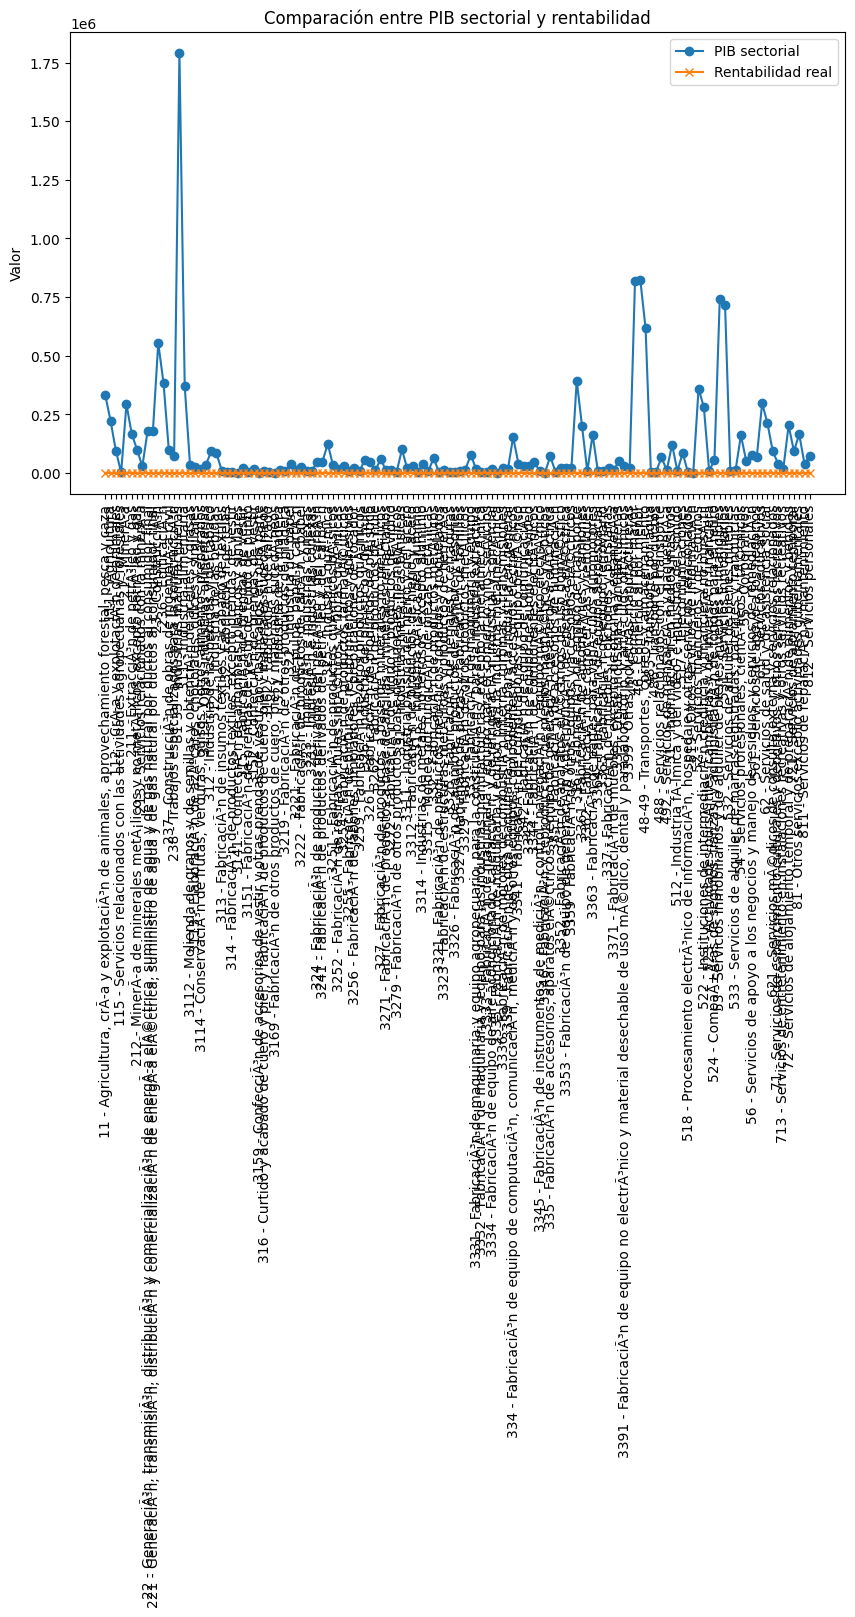

In [22]:
# Graficar PIB sectorial y rentabilidad
plt.figure(figsize=(10, 6))
plt.plot(dfinal3["Concepto"], dfinal3["PIB sectorial"], label="PIB sectorial", marker='o')
plt.plot(dfinal3["Concepto"], dfinal3["Rentabilidad real"], label="Rentabilidad real", marker='x')
plt.xticks(rotation=90)
plt.ylabel("Valor")
plt.title("Comparación entre PIB sectorial y rentabilidad")
plt.legend()
plt.tight_layout()
plt.show()


## 5. Actividades con rentabilidad negativa

In [23]:
rentabilidad_negativa = dfinal3[dfinal3["Rentabilidad real"] < 0]
print("Actividades con rentabilidad negativa:")
print(rentabilidad_negativa)

Actividades con rentabilidad negativa:
                                              Concepto  PIB sectorial  \
38               323 - ImpresiÃ³n e industrias conexas      9033.6792   
39              3231 - ImpresiÃ³n e industrias conexas      9033.6792   
43   3251 - FabricaciÃ³n de productos quÃ­micos bÃ¡...     32515.0714   
46   3255 - FabricaciÃ³n de pinturas, recubrimiento...      8794.6950   
53   3271 - FabricaciÃ³n de productos a base de arc...     10715.8296   
63   3321 - FabricaciÃ³n de productos metÃ¡licos fo...      2348.0800   
70   3331 - FabricaciÃ³n de maquinaria y equipo agr...     15892.0944   
71   3332 - FabricaciÃ³n de maquinaria y equipo par...      5106.1374   
76   3339 - FabricaciÃ³n de otra maquinaria y equip...     15937.1786   
103                          483 - Transporte por agua      5658.8070   
109                           517 - Telecomunicaciones     84647.2312   
125     62 - Servicios de salud y de asistencia social    212820.4162   

     Rentab

## ¿Existe una relación entre el pib y la IED?

In [25]:
# Calcular la correlación
correlacion = dfinal3['PIB sectorial'].corr(dfinal3['IDE A MDP'])
print(f"Correlación entre PIB sectorial e IDE: {correlacion:.2f}")

Correlación entre PIB sectorial e IDE: 0.70


## ACTIVIDADES CON LA MAYOR INVERSIÓN EXTRANJERA

In [27]:
# Filtrar las 5 actividades con mayor inversión extranjera
top_inversion = dfinal3.nlargest(5, 'IDE A MDP')
print("Top 5 actividades con mayor IED:")
print(top_inversion)


Top 5 actividades con mayor IED:
                                              Concepto  PIB sectorial  \
14                   31-33 - Industrias manufactureras   1.790320e+06   
112            52 - Servicios financieros y de seguros   3.597062e+05   
89          336 - FabricaciÃ³n de equipo de transporte   3.942640e+05   
113  522 - Instituciones de intermediaciÃ³n crediti...   2.807581e+05   
90      3361 - FabricaciÃ³n de automÃ³viles y camiones   2.018604e+05   

     Rentabilidad real  IDE A MDP  Negativo  
14            2.779352   644150.0     False  
112           1.448023   248412.0     False  
89            1.707820   230858.0     False  
113           1.410150   199098.0     False  
90            1.244592   162190.0     False  
